<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Recap-on-urn-estimation-with-no-hazard" data-toc-modified-id="Recap-on-urn-estimation-with-no-hazard-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Recap on urn estimation with no hazard</a></span><ul class="toc-item"><li><span><a href="#Some-mathematical-notation" data-toc-modified-id="Some-mathematical-notation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Some mathematical notation</a></span></li><li><span><a href="#The-posterior" data-toc-modified-id="The-posterior-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The posterior</a></span></li><li><span><a href="#The-log-posterior-odds" data-toc-modified-id="The-log-posterior-odds-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>The log-posterior odds</a></span></li></ul></li><li><span><a href="#When-there-is-a-constant-&amp;-known-hazard-rate" data-toc-modified-id="When-there-is-a-constant-&amp;-known-hazard-rate-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>When there is a constant &amp; known hazard rate</a></span></li></ul></div>

# Recap on urn estimation with no hazard

- beads are sampled sequentially from a single urn which can be of two sorts: red vs. blue
- select the urn from which you believe the beads are being sampled from

## Some mathematical notation
\begin{equation*}
U := \text{Urn } \in \{\text{red},\text{blue}  \}
\end{equation*}
\begin{equation*}
b_n := \text{bead number }n\text{      }   (b_n\in \{\text{red},\text{blue}  \})
\end{equation*}
\begin{equation*}
l_U(b) := P(b|U)=0.8 \text{   if } b=U \text{   and }0.2\text{    otherwise}
\end{equation*}


## The posterior

In [1]:
import os, sys
sys.path.append(os.path.expanduser('~/Git/GitHub/work/Analysis_Audio2AFC_ChangePoint/Python_modules'))
import mmcomplexity as mmx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

\begin{equation}\label{eq:}
P(U|b_{1:n}) \propto \pi(U)\prod_{i=1}^n l_U(b_i)
\end{equation}


In [20]:
def plot_posterior_and_beads(beads, prior=(0.5, 0.5)):
    """
    :param beads: (list) of beads observations, either 'red' or 'blue' 
    """
    # compute a few things
    num_trials = len(beads)
    x = {'blue': [], 'red': [], 'all': range(num_trials + 1)}  # holds indices for x-axis
    for i, b in enumerate(beads):
        x[b].append(i)
        
    mksize=12           # marker size in plot
    y = np.array(beads)  # numpy array allows easier indexing
    
    #=== block to compute posterior ==#
    def col2side(c):
        side = 'right' if c == 'red' else 'blue'
        return side
    sided_beads = [col2side(c) for c in beads]
    stim_block = mmx.StimulusBlock(num_trials, 0, sources=['left']*num_trials, sounds=sided_beads)
    dm = mmx.KnownHazard(stim_block, sources_prior=prior)
    dm.observe()
    discrimination_decisions = list(dm.process())
    discrimination_posterior = [mmx.log_odds_to_posterior(d[0])['right'] for d in discrimination_decisions]
    discrimination_posterior.insert(0, dm.sources_prior['right'])
    
    #=== end of block ==#
    
    # figure setup
    fig = plt.figure(figsize=(15,6))
    plt.rcParams.update({'font.size': 22})
    
    # plot posterior
    ax1 = fig.add_subplot(111)
    ax1.step(x['all'], discrimination_posterior, 'r-', where='post')
    ax1.plot(x['all'], [0.5]*(num_trials+1), 'k--')
    
    ax1.set_ylabel("P('red urn' | beads)")
    ax1.set_ylim(0,1)
    
    # plot beads
    ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
    
    ax2.plot(np.array(x['blue'])+1, y[x['blue']], 'ob', markersize=mksize)
    ax2.plot(np.array(x['red'])+1, y[x['red']], 'or', markersize=mksize)
    
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.set_xlabel('trial number')
    ax2.set_ylabel('bead')
    
    
    plt.xticks(x['all'])
    

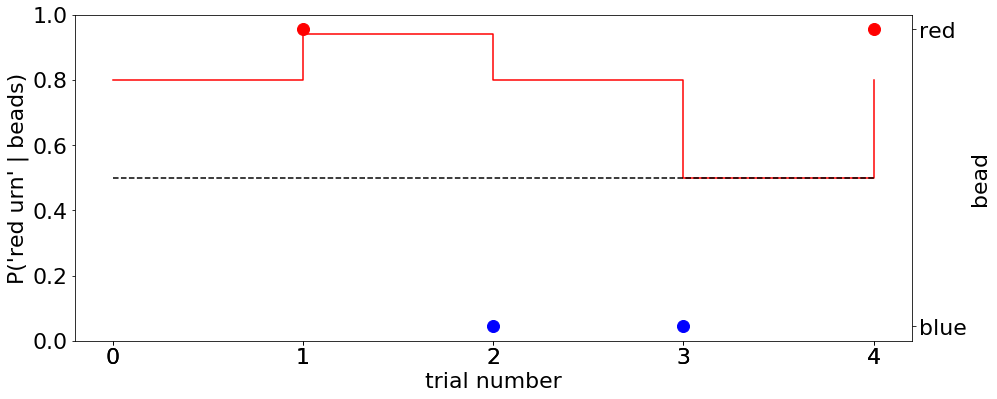

In [23]:
beads = ['red', 'blue', 'blue', 'red']
pred=0.8
plot_posterior_and_beads(beads, (1-pred, pred))

## The log-posterior odds

# When there is a constant & known hazard rate